In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/content/sample_data/Bechdel_IMDB_Merge0524.csv')
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre1,genre2,genre3
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,Romance,NaN,NaN
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,Action,Adventure,Biography
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,Drama,History,NaN
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,Comedy,NaN,NaN
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,Drama,History,War
...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,Comedy,Horror,Romance
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,Action,Adventure,Crime
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,Comedy,Musical,NaN
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,Action,Adventure,Animation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   genre1             9718 non-null   object 
 9   genre2             8446 non-null   object 
 10  genre3             5807 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 835.3+ KB


In [ ]:
def dummy_columns(df, col, drop_first=False, add_prefix=False, prefix=''):
    if add_prefix == True:
        column_dummies = pd.get_dummies(df[col], drop_first=drop_first, prefix=prefix)
    else:
        column_dummies = pd.get_dummies(df[col], drop_first=drop_first)
    df = df.merge(column_dummies, how='left', left_on=df.index, right_on=column_dummies.index)
    df.drop(['key_0', col], axis=1, inplace=True)
    return df

In [ ]:
df = dummy_columns(df, 'genre1')
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre2,genre3,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,\N
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,NaN,NaN,...,False,False,False,False,False,True,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,Adventure,Biography,...,False,False,False,False,False,False,False,False,False,False
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,History,NaN,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,History,War,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,Horror,Romance,...,False,False,False,False,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,Adventure,Crime,...,False,False,False,False,False,False,False,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,Musical,NaN,...,False,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,Adventure,Animation,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   genre2             8446 non-null   object 
 9   genre3             5807 non-null   object 
 10  Action             9718 non-null   bool   
 11  Adult              9718 non-null   bool   
 12  Adventure          9718 non-null   bool   
 13  Animation          9718 non-null   bool   
 14  Biography          9718 non-null   bool   
 15  Comedy             9718 non-null   bool   
 16  Crime              9718 

In [ ]:
df.drop(['\\N'], axis=1, inplace=True)
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre2,genre3,...,Film-Noir,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,Western
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,NaN,NaN,...,False,False,False,False,False,False,True,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,Adventure,Biography,...,False,False,False,False,False,False,False,False,False,False
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,History,NaN,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,History,War,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,Horror,Romance,...,False,False,False,False,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,Adventure,Crime,...,False,False,False,False,False,False,False,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,Musical,NaN,...,False,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,Adventure,Animation,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df = dummy_columns(df, 'genre2')
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,genre3,Action,...,Music_y,Musical_y,Mystery_y,News,Romance_y,Sci-Fi_y,Sport,Thriller_y,War,Western_y
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,Biography,True,...,False,False,False,False,False,False,False,False,False,False
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,NaN,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,NaN,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,War,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,Romance,False,...,False,False,False,False,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,Crime,True,...,False,False,False,False,False,False,False,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,NaN,False,...,False,True,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,Animation,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 52 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   genre3             5807 non-null   object 
 9   Action             9718 non-null   bool   
 10  Adult              9718 non-null   bool   
 11  Adventure_x        9718 non-null   bool   
 12  Animation_x        9718 non-null   bool   
 13  Biography_x        9718 non-null   bool   
 14  Comedy_x           9718 non-null   bool   
 15  Crime_x            9718 non-null   bool   
 16  Documentary_x      9718 

In [ ]:
df = dummy_columns(df, 'genre3')
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Music,Musical,Mystery,News_y,Romance,Sci-Fi,Sport_y,Thriller,War_y,Western
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,True,False,...,False,False,False,False,False,False,False,False,False,False
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,False,False,...,False,False,False,False,True,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,True,False,...,False,False,False,False,False,False,False,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,False,False,...,False,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 72 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   Action             9718 non-null   bool   
 9   Adult              9718 non-null   bool   
 10  Adventure_x        9718 non-null   bool   
 11  Animation_x        9718 non-null   bool   
 12  Biography_x        9718 non-null   bool   
 13  Comedy_x           9718 non-null   bool   
 14  Crime_x            9718 non-null   bool   
 15  Documentary_x      9718 non-null   bool   
 16  Drama_x            9718 

In [ ]:
df['Adventure'] = df['Adventure_x'] + df['Adventure_y']
df.drop(['Adventure_x', 'Adventure_y'], axis=1, inplace=True)
df['Animation'] = df['Animation_x'] + df['Animation_y'] + df['Animation']
df.drop(['Animation_x', 'Animation_y'], axis=1, inplace=True)
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,News_y,Romance,Sci-Fi,Sport_y,Thriller,War_y,Western,Adventure
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,False,False,...,False,False,False,True,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,True,False,...,False,False,False,False,False,False,False,False,False,True
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,False,False,...,False,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 69 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   Action             9718 non-null   bool   
 9   Adult              9718 non-null   bool   
 10  Biography_x        9718 non-null   bool   
 11  Comedy_x           9718 non-null   bool   
 12  Crime_x            9718 non-null   bool   
 13  Documentary_x      9718 non-null   bool   
 14  Drama_x            9718 non-null   bool   
 15  Family_x           9718 non-null   bool   
 16  Fantasy_x          9718 

In [ ]:
def combine_num_columns(df, final_column, columns, drop_columns):
    for col in columns:
        df[final_column] += df[col]
    df.drop(drop_columns, axis=1, inplace=True)
    return df

In [ ]:
df = combine_num_columns(df, 'Biography', ['Biography_x', 'Biography_y', 'Biography'], ['Biography_x', 'Biography_y'])
df = combine_num_columns(df, 'Comedy', ['Comedy_x', 'Comedy_y', 'Comedy'], ['Comedy_x', 'Comedy_y'])
df = combine_num_columns(df, 'Crime', ['Crime_x', 'Crime_y', 'Crime'], ['Crime_x', 'Crime_y'])
df = combine_num_columns(df, 'Documentary', ['Documentary_x', 'Documentary_y', 'Documentary'], ['Documentary_x', 'Documentary_y'])
df = combine_num_columns(df, 'Drama', ['Drama_x', 'Drama_y', 'Drama'], ['Drama_x', 'Drama_y'])
df = combine_num_columns(df, 'Family', ['Family_x', 'Family_y', 'Family'], ['Family_x', 'Family_y'])
df = combine_num_columns(df, 'Fantasy', ['Fantasy_x', 'Fantasy_y', 'Fantasy'], ['Fantasy_x', 'Fantasy_y'])
df = combine_num_columns(df, 'Film-Noir', ['Film-Noir_x', 'Film-Noir_y', 'Film-Noir'], ['Film-Noir_x', 'Film-Noir_y'])
df = combine_num_columns(df, 'History', ['History_x', 'History_y', 'History'], ['History_x', 'History_y'])
df = combine_num_columns(df, 'Horror', ['Horror_x', 'Horror_y', 'Horror'], ['Horror_x', 'Horror_y'])
df = combine_num_columns(df, 'Music', ['Music_x', 'Music_y', 'Music'], ['Music_x', 'Music_y'])
df = combine_num_columns(df, 'Musical', ['Musical_x', 'Musical_y', 'Musical'], ['Musical_x', 'Musical_y'])
df = combine_num_columns(df, 'Mystery', ['Mystery_x', 'Mystery_y', 'Mystery'], ['Mystery_x', 'Mystery_y'])
df = combine_num_columns(df, 'Romance', ['Romance_x', 'Romance_y', 'Romance'], ['Romance_x', 'Romance_y'])
df = combine_num_columns(df, 'Sci-Fi', ['Sci-Fi_x', 'Sci-Fi_y', 'Sci-Fi'], ['Sci-Fi_x', 'Sci-Fi_y'])
df = combine_num_columns(df, 'Thriller', ['Thriller_x', 'Thriller_y', 'Thriller'], ['Thriller_x', 'Thriller_y'])
df = combine_num_columns(df, 'Western', ['Western_x', 'Western_y', 'Western'], ['Western_x', 'Western_y'])
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,News_y,Romance,Sci-Fi,Sport_y,Thriller,War_y,Western,Adventure
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,False,False,...,False,False,False,True,False,False,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,True,False,...,False,False,False,False,False,False,False,False,False,True
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,False,False,...,False,False,False,True,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,True,False,...,False,False,False,False,False,False,False,False,False,True
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,False,False,...,True,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,True,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   Action             9718 non-null   bool   
 9   Adult              9718 non-null   bool   
 10  News_x             9718 non-null   bool   
 11  Sport_x            9718 non-null   bool   
 12  War_x              9718 non-null   bool   
 13  Animation          9718 non-null   bool   
 14  Biography          9718 non-null   bool   
 15  Comedy             9718 non-null   bool   
 16  Crime              9718 

In [ ]:
# df = combine_num_columns(df, 'News', ['News_x', 'News_y'], ['News_x', 'News_y'])
df['News'] = df['News_x'] + df['News_y']
df.drop(['News_x', 'News_y'], axis=1, inplace=True)
# df = combine_num_columns(df, 'Sport', ['Sport_x', 'Sport_y'], ['Sport_x', 'Sport_y'])
df['Sport'] = df['Sport_x'] + df['Sport_y']
df.drop(['Sport_x', 'Sport_y'], axis=1, inplace=True)
# df = combine_num_columns(df, 'War', ['War_x', 'War_y'], ['War_x', 'War_y'])
df['War'] = df['War_x'] + df['War_y']
df.drop(['War_x', 'War_y'], axis=1, inplace=True)
df

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,Adventure,News,Sport,War
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,False,False,...,False,False,True,False,False,False,False,False,False,False
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,True,False,...,False,False,False,False,False,False,True,False,False,False
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9713,Lisa Frankenstein,2024,21188080.0,11276,2,6.1,16176.0,101,False,False,...,False,False,True,False,False,False,False,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,True,False,...,False,False,False,False,False,False,True,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,False,False,...,True,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,True,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9718 entries, 0 to 9717
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              9718 non-null   object 
 1   year               9718 non-null   int64  
 2   imdbid             9718 non-null   float64
 3   id                 9718 non-null   int64  
 4   bechdelRating      9718 non-null   int64  
 5   imdbAverageRating  9718 non-null   float64
 6   numVotes           9718 non-null   float64
 7   runtimeMinutes     9718 non-null   object 
 8   Action             9718 non-null   bool   
 9   Adult              9718 non-null   bool   
 10  Animation          9718 non-null   bool   
 11  Biography          9718 non-null   bool   
 12  Comedy             9718 non-null   bool   
 13  Crime              9718 non-null   bool   
 14  Documentary        9718 non-null   bool   
 15  Drama              9718 non-null   bool   
 16  Family             9718 

In [ ]:
df.nunique()

,0
title,9478
year,114
imdbid,9710
id,9718
bechdelRating,4
imdbAverageRating,80
numVotes,8928
runtimeMinutes,175
Action,2
Adult,2


In [ ]:
zero_rating = df[df['bechdelRating'] == 0]
zero_rating

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,Adventure,News,Sport,War
0,Miss Jerry,1894,9.0,9779,0,5.4,212.0,45,False,False,...,False,False,True,False,False,False,False,False,False,False
6,Intolerance: Love&#39;s Struggle Throughout th...,1916,6864.0,5944,0,7.7,16762.0,163,False,False,...,False,False,False,False,False,False,False,False,False,False
9,A Romance of the Redwoods,1917,8519.0,2015,0,6.2,863.0,70,False,False,...,False,False,False,False,False,False,True,False,False,False
17,Broken Blossoms or The Yellow Man and the Girl,1919,9968.0,2588,0,7.2,11084.0,90,False,False,...,False,False,True,False,False,False,False,False,False,False
19,"Cabinet of Dr. Caligari, The",1920,10323.0,1306,0,8.0,70264.0,67,False,False,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,All of us strangers,2023,21192142.0,11278,0,7.7,49353.0,105,False,False,...,False,False,True,False,False,False,False,False,False,False
9604,Champions,2023,15339570.0,10977,0,6.8,26373.0,124,False,False,...,False,False,False,False,False,False,False,False,True,False
9608,Chupa,2023,14923260.0,10860,0,5.5,7340.0,95,True,False,...,False,False,False,False,False,False,True,False,False,False
9649,La Sociedad de la Nieve,2023,16277242.0,11283,0,7.8,135692.0,144,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
one_rating = df[df['bechdelRating'] == 1]
one_rating

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,Adventure,News,Sport,War
1,"Story of the Kelly Gang, The",1906,574.0,1349,1,6.0,903.0,70,True,False,...,False,False,False,False,False,False,True,False,False,False
29,"Man from Beyond, The",1922,13367.0,2001,1,5.3,337.0,74,False,False,...,False,True,False,True,False,False,False,False,False,False
30,Nanook of the North,1922,13427.0,5901,1,7.6,13486.0,78,False,False,...,False,False,False,False,False,False,False,False,False,False
58,Die Abenteuer des Prinzen Achmed,1926,15532.0,5974,1,7.8,6914.0,80,False,False,...,False,False,False,False,False,False,True,False,False,False
59,Flesh and the Devil,1926,16884.0,1260,1,7.6,4641.0,112,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9653,Liu lang di qiu 2,2023,13539646.0,10918,1,6.8,13734.0,173,True,False,...,False,False,False,False,False,False,True,False,False,False
9660,My Fault,2023,21909764.0,11321,1,6.2,24408.0,117,False,False,...,False,False,True,False,False,False,False,False,False,False
9690,"Super Mario Bros. Movie, The",2023,6718170.0,10839,1,7.0,239051.0,92,False,False,...,False,False,False,False,False,False,True,False,False,False
9705,Cabrini,2024,14351082.0,11289,1,7.5,4825.0,142,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
two_rating = df[df['bechdelRating'] == 2]
two_rating

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,Adventure,News,Sport,War
2,Cleopatra,1912,2101.0,2003,2,5.1,622.0,100,False,False,...,False,False,False,False,False,False,False,False,False,False
3,A Florida Enchantment,1914,3973.0,4457,2,5.8,300.0,63,False,False,...,False,False,False,False,False,False,False,False,False,False
4,"Birth of a Nation, The",1915,4972.0,1258,2,6.1,26403.0,195,False,False,...,False,False,False,False,False,False,False,False,False,True
12,"Raffles, the Amateur Cracksman",1917,8489.0,2019,2,6.4,190.0,70,False,False,...,False,False,True,False,False,False,True,False,False,False
23,K&ouml;rkarlen (The Phantom Carriage),1921,12364.0,5898,2,8.0,14145.0,107,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9659,My Christmas Hero,2023,27542956.0,11184,2,6.5,660.0,84,False,False,...,False,False,True,False,False,False,False,False,False,False
9665,Oppenheimer,2023,15398776.0,10957,2,8.3,744255.0,180,False,False,...,False,False,False,False,False,False,False,False,False,False
9680,Reptile,2023,13274016.0,11093,2,6.8,89113.0,134,False,False,...,False,True,False,False,False,False,False,False,False,False
9686,Second tour,2023,27851639.0,11164,2,6.3,848.0,95,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
three_rating = df[df['bechdelRating'] == 3]
three_rating

,title,year,imdbid,id,bechdelRating,imdbAverageRating,numVotes,runtimeMinutes,Action,Adult,...,Musical,Mystery,Romance,Sci-Fi,Thriller,Western,Adventure,News,Sport,War
5,Gretchen the Greenhorn,1916,6745.0,2008,3,6.4,537.0,58,False,False,...,False,False,True,False,False,False,False,False,False,False
7,Lady Windermere&#39;s Fan,1916,279914.0,2014,3,5.3,66.0,66,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Snow White,1916,7361.0,7004,3,6.3,444.0,63,False,False,...,False,False,True,False,False,False,False,False,False,False
10,A Tale of Two Cities,1917,8652.0,1981,3,6.1,163.0,70,False,False,...,False,False,True,False,False,False,False,False,False,False
11,"Poor Little Rich Girl, The",1917,8443.0,1994,3,6.7,1550.0,78,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9712,Kung Fu Panda 4,2024,21692408.0,11293,3,6.3,39606.0,94,True,False,...,False,False,False,False,False,False,True,False,False,False
9714,Love Lies Bleeding,2024,19637052.0,11294,3,6.7,23333.0,104,True,False,...,False,False,False,False,False,False,True,False,False,False
9715,Mean Girls,2024,11762114.0,11271,3,5.7,28257.0,112,False,False,...,True,False,False,False,False,False,False,False,False,False
9716,Megamind vs. The Doom Syndicate,2024,31122323.0,11280,3,2.4,4076.0,83,True,False,...,False,False,False,False,False,False,True,False,False,False


DataFrame columns: Index(['title', 'year', 'imdbid', 'id', 'bechdelRating', 'imdbAverageRating',
       'numVotes', 'runtimeMinutes', 'Action', 'Adult', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Western', 'Adventure',
       'News', 'Sport', 'War'],
      dtype='object')


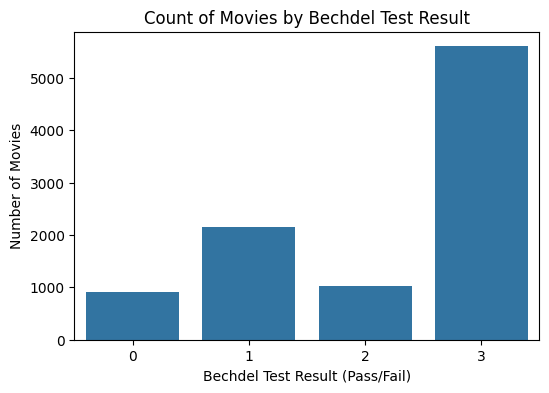

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: inspect available columns
print("DataFrame columns:", df.columns)

# -------------------------------
# 1. Count Plot: Bechdel Test Results
# -------------------------------
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='bechdelRating')  # Replace 'binary' with your actual column name if different
plt.title('Count of Movies by Bechdel Test Result')
plt.xlabel('Bechdel Test Result (Pass/Fail)')
plt.ylabel('Number of Movies')
plt.show()

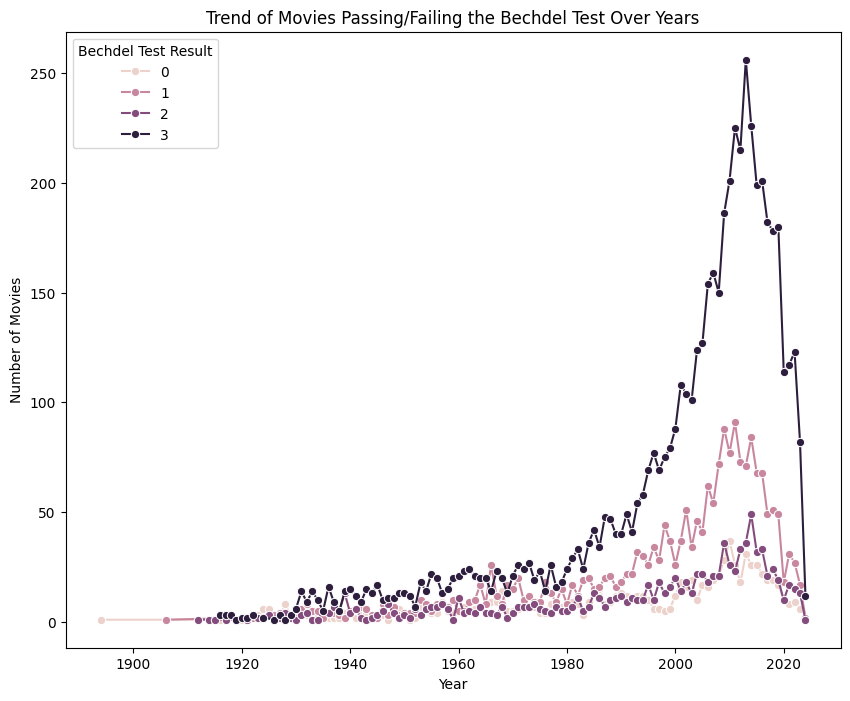

In [52]:
# -------------------------------
# 2. Trend Over Years: Movies Passing/Failing the Bechdel Test
# -------------------------------
# Group data by year and test result then reset index for plotting
df_yearly = df.groupby(['year', 'bechdelRating']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.lineplot(data=df_yearly, x='year', y='count', hue='bechdelRating', marker='o')
plt.title('Trend of Movies Passing/Failing the Bechdel Test Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Bechdel Test Result')
plt.show()

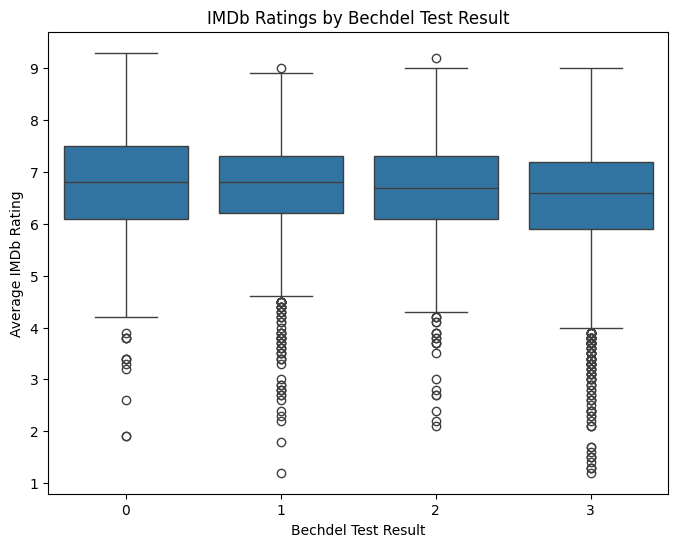

In [56]:
# -------------------------------
# 3. Box Plot: IMDb Ratings by Bechdel Test Result
# -------------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bechdelRating', y='imdbAverageRating')  # Adjust column name if needed
plt.title('IMDb Ratings by Bechdel Test Result')
plt.xlabel('Bechdel Test Result')
plt.ylabel('Average IMDb Rating')
plt.show()

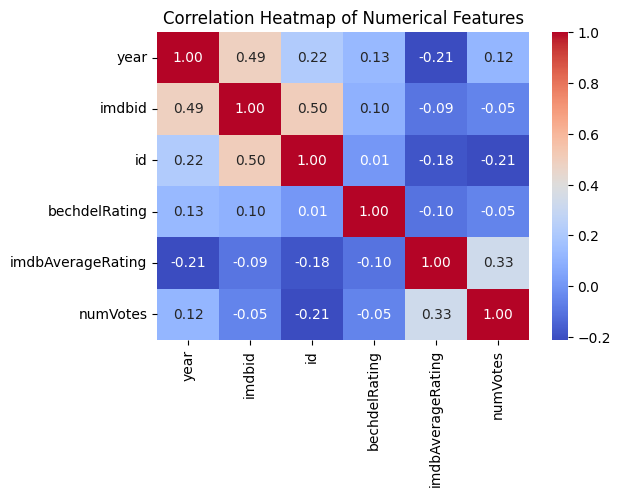

In [54]:
# -------------------------------
# 4. Correlation Heatmap: Numerical Features
# -------------------------------
plt.figure(figsize=(6, 4))
# Select only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()